## Statistic

In [50]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import json
import numpy as np
import matplotlib.font_manager as font_manager

In [28]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%)"

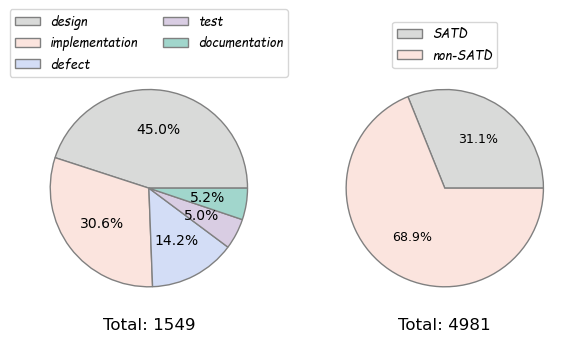

In [54]:
font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='normal',
                                   style='italic', size=9)


fig, axs = plt.subplots(1,2, figsize=(7, 5))

x = [697, 474, 220, 78, 80]
labels = ["design", "implementation", "defect", "test", "documentation"]
colors = ["#d9dad9", "#fbe4de", "#d3ddf6", "#d9cde3", "#a1d6cc"]

# Capture each of the return elements.
patches, texts, pcts = axs[0].pie(
    x, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'grey'},
    textprops={'size': 'small', 'fontstyle': 'italic', 'weight': 'bold'}, colors= colors)
# Style just the percent values.
axs[0].legend(patches, labels,
          loc="upper center",
          bbox_to_anchor=(0.5, 1.25),
          ncols = 2,
          prop=font)

plt.setp(pcts, color='black', fontweight='normal', fontstyle= 'normal', fontsize=10)
axs[0].set_xlabel('Total: ' + str(sum(x)), fontsize=12)


x = [1549, 3432]
labels = ["SATD", "non-SATD"]
colors = ["#d9dad9", "#fbe4de", "#d3ddf6", "#d9cde3", "#a1d6cc"]

# Capture each of the return elements.
patches, texts, pcts = axs[1].pie(
    x, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'grey'},
    textprops={'size': 'small', 'fontstyle': 'italic', 'weight': 'bold'}, colors= colors)
# Style just the percent values.
plt.setp(pcts, color='black', fontweight='normal', fontstyle= 'normal', fontsize=9)
axs[1].legend(patches, labels,
          loc="upper center",
          bbox_to_anchor=(0.5, 1.2),
          ncols = 1,
          prop=font)

axs[1].set_xlabel('Total: ' + str(sum(x)), fontsize=12)
plt.savefig('data_distribution.pdf', bbox_inches='tight')

In [1]:
from datasets import load_dataset
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = load_dataset("NamCyan/tesoro", split="train")

In [3]:
function_multi_label = {}

for dp in data:
  if dp["id"] not in function_multi_label:
    function_multi_label[dp["id"]] = []
  function_multi_label[dp["id"]].append(dp["classification"])

TD_per_function = []
comment_per_function = []
comment_TD_per_function = []


for id in function_multi_label:
  comment_per_function.append(len(function_multi_label[id]))
  if len(set(function_multi_label[id])) == 1 and "NONSATD" in function_multi_label[id]:
    TD_per_function.append(0)
    comment_TD_per_function.append(0)
  else:
    TD_per_function.append(len(set([x for x in function_multi_label[id] if x != "NONSATD"])))
    comment_TD_per_function.append(len([x for x in function_multi_label[id] if x != "NONSATD"]))

print(np.mean(TD_per_function))
print(np.mean(comment_per_function))
print(np.mean(comment_TD_per_function))

1.0382470119521912
3.9689243027888446
1.2342629482071714


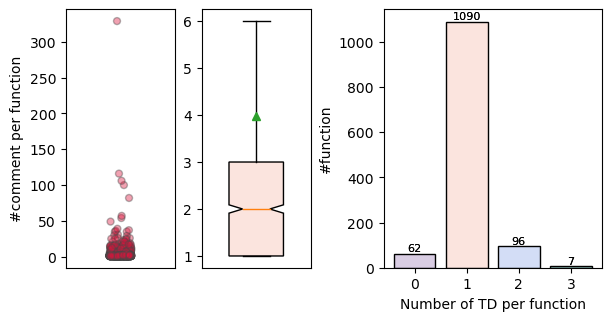

In [5]:
fig, axs = plt.subplots(1,3, figsize = (6,3.1), gridspec_kw={'width_ratios': [1, 1, 2]}, layout="constrained")
TD_per_function = Counter(TD_per_function)
# comment_per_function = Counter(comment_per_function)


# axs[0].bar(list(comment_per_function.keys()), list(comment_per_function.values()))
bplt= axs[1].boxplot(comment_per_function,
               notch=True, patch_artist=True, widths=[0.5],
showmeans = True,
showfliers = False)  # Sop showing the fliers
axs[1].set_xticks([])

colors = ["#fbe4de", "#d3ddf6", "#d9cde3", "#a1d6cc"]
for patch, color in zip(bplt['boxes'], colors):
    patch.set_facecolor(color)


# Strip plot
sns.stripplot(data=comment_per_function,
ax=axs[0],
color = "crimson", # Colours the dots
linewidth = 1,     # Dot outline width
alpha = 0.4)       # Makes them transparent
axs[0].set_xticks([])
axs[0].set_ylabel("#comment per function")

barplt = axs[2].bar(list(TD_per_function.keys()), list(TD_per_function.values()),
                    edgecolor='black', linewidth=1, color=colors)

axs[2].bar_label(barplt, color='black', fontsize=8)
for bars in axs[2].containers:
    axs[2].bar_label(bars, color='black', fontsize=8)

axs[2].set_xlabel("Number of TD per function")
axs[2].set_ylabel("#function")
# plt.tight_layout()
plt.savefig("code_distribution.pdf", bbox_inches='tight')
